In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math
import scipy.stats as stats
from AuNR_Automated_Analysis import Absorption_decon, Deconvolution_Output
%load_ext autoreload
%autoreload 2

(46, 491, 1299)
Long Rod


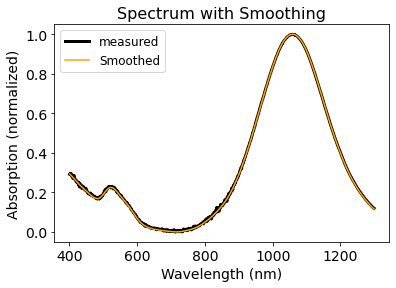

1059
401 1299
[22]
522
printing longitudinal
[532]
max post transverse
126
121
1.0
peak location = 1059
[6.726315789473684, 1059, 1.0, 522]
Guessed AR 6.726315789473684
setting peaks
401
401 1299
[0, 899, 'Red']


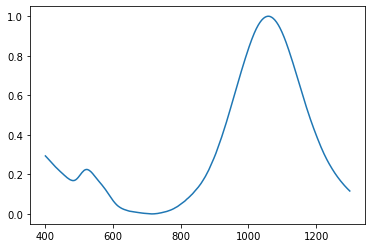

comparision peak indicies
[0, 899, 'Red']
401 1299
401 1300


In [2]:
Decon_obj = Absorption_decon('C:/Users/smgls/PycharmProjects/Data_Models_and_Spectra/Long Rod.csv', smooth_spectrum = True, pick_longitudinal = False, blue_baseline = False, 
                                         show_sim = False, smoothing_parameters = [51,3]) 

In [3]:
temp = joblib.load('C:/Users/smgls/PycharmProjects/Data_Models_and_Spectra/AuNR Simulations/DF_Full_1_20_2021.joblib')

In [4]:
wang_long_rod = pd.read_csv('C:/Users/smgls/PycharmProjects/Data_Models_and_Spectra/Long Rod.csv')
wang_long_rod

,Wavelength nm.,Abs.
0,401,0.2467
1,402,0.2462
2,403,0.2485
3,404,0.2472
4,405,0.2462
...,...,...
894,1295,0.1682
895,1296,0.1678
896,1297,0.1667
897,1298,0.1659


In [5]:
long_rod_fit = joblib.load("C:/Users/smgls/PycharmProjects/Data_Models_and_Spectra/Predictions/040424_validation/790 nm on with true vals/len_dia_rel_stdLong Rod650_nm_on.joblib")

In [6]:
best_fit_from_pop = long_rod_fit.fit_results['len_dia_correlation_rel_std'][0][0][4]

len_dia_correlation_rel_std


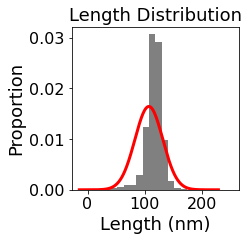

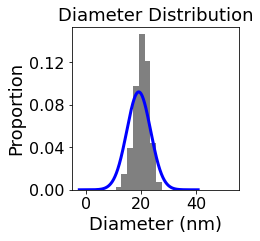

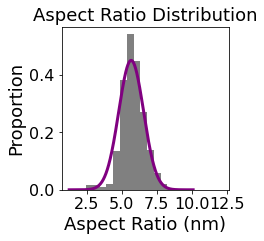

In [7]:
plt.rcParams['pdf.fonttype'] = 'truetype'
long_rod_fit.plot_all_distributions()

In [9]:
from_pop = long_rod_fit.fit_results['len_dia_correlation_rel_std'][0][0][4]

In [10]:
dir(long_rod_fit)

['TEM_results',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_tems',
 'add_true_vals',
 'ar_len_matrix_ars',
 'ars',
 'ars_to_hist',
 'bivariate_gaussian_len_dia',
 'blue_baseline_intens',
 'blue_baseline_wavelengths',
 'blue_edge_location',
 'calc_overlap_from_lit',
 'calculate_overlap',
 'compare_distributions_to_tem',
 'compare_to_true_vals',
 'diameters',
 'diameters_to_hist',
 'display_predicted_values',
 'extracted_longitudinal',
 'fit_description',
 'fit_h12',
 'fit_results',
 'generate_true_predicted_distributions',
 'get_true_vals',
 'inputted_spectrum',
 'lengths',
 'lengths_to_hist',
 'longitudinal_threshold',
 'longitudinal_wavelengths',
 'name',
 'o

0.9996099793152894


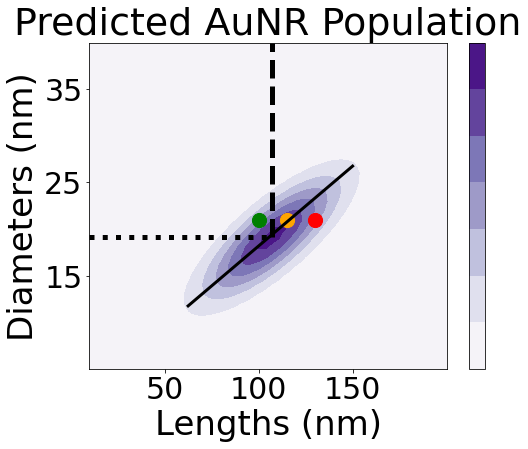

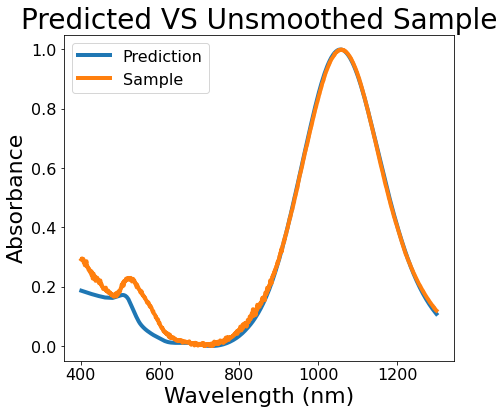

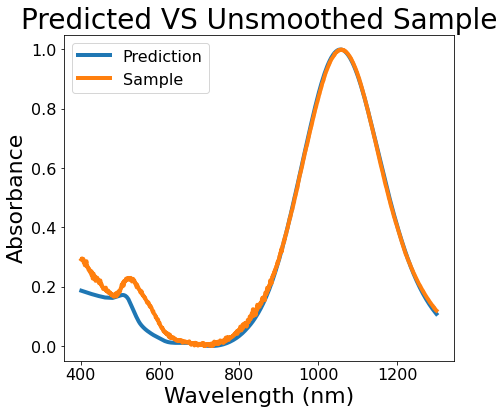

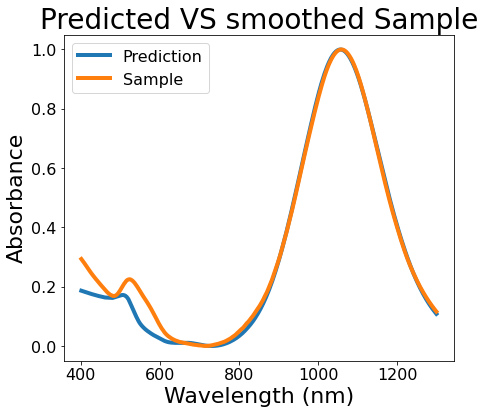

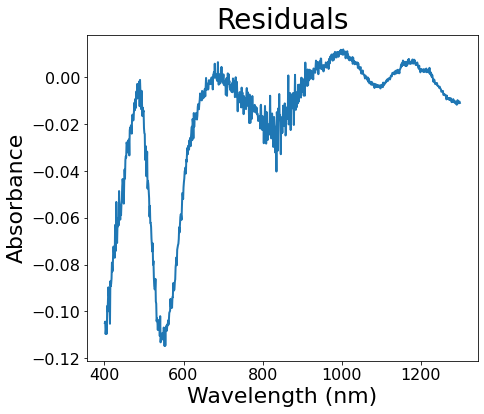

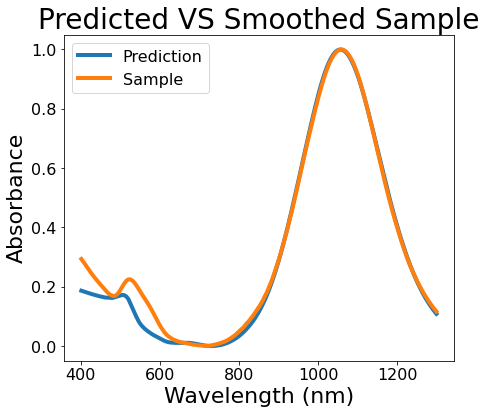

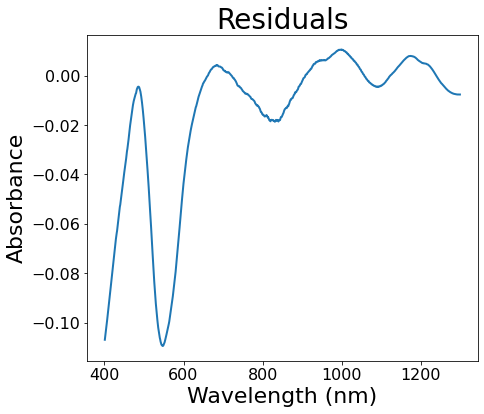

In [11]:
plt.rcParams['pdf.fonttype'] = 'truetype'
sim_output = Decon_obj.sim('len_dia_correlation_rel_std', long_rod_fit.fit_results['len_dia_correlation_rel_std'][0][0][0], simulation_baseline = True, show_plot = True,
                          fit_vals_from_pop = from_pop)

In [12]:
sample_baselined = wang_long_rod['Abs.'][0:900] - min(wang_long_rod['Abs.'][0:900])

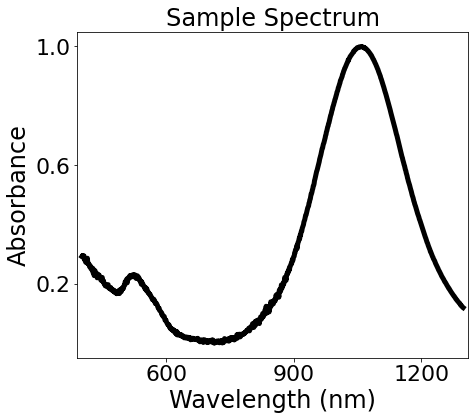

In [13]:
plt.figure(figsize = (7.0, 6.0))

plt.plot(wang_long_rod['Wavelength nm.'], sample_baselined/max(sample_baselined), 'k', linewidth  = 5, label = 'AuNR Sample')

plt.title("Sample Spectrum", fontsize = 24)
plt.xlabel("Wavelength (nm)", fontsize = 24)
plt.ylabel("Absorbance", fontsize = 24)
plt.xticks([600, 900, 1200], fontsize = 22)
plt.yticks([0.2, 0.6, 1], fontsize = 22)
plt.xlim([390, 1310])
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.savefig('Fig_4_Sample.pdf', bbox_inches = 'tight', transparent = True)


AuNR Sample
Fitted Spectrum
110x21nm


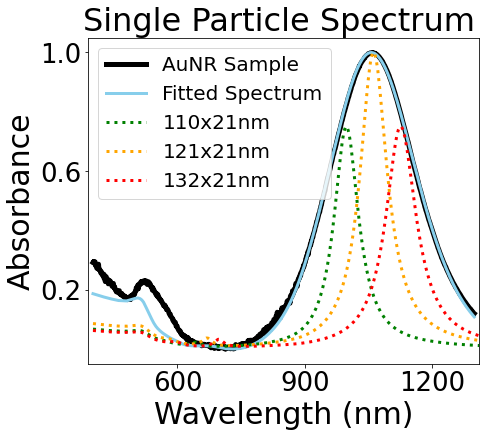

In [14]:
plt.figure(figsize = (7.0, 6.0))
rod_indicies = [7641, 7652, 7663]
# sizes = ['100x21 nm', '115x21 nm', '130x21 nm']
# scale_list = [0.75, 1, 0.75]
# color_list = ['g', 'orange', 'r']
plt.plot(wang_long_rod['Wavelength nm.'], sample_baselined/max(sample_baselined), 'k', linewidth  = 5, label = 'AuNR Sample')
plt.plot(wang_long_rod['Wavelength nm.'], sim_output[0], color = 'skyblue', linewidth = 3)
# plt.plot(temp.iloc[7641].results['wavelength_micron']*1000, 0.75*temp.iloc[7641].results['orientation_av_absorption_CrossSection_m2']/max(temp.iloc[7641].results['orientation_av_absorption_CrossSection_m2']), 'g', linewidth=  3)
# plt.plot(temp.iloc[7652].results['wavelength_micron']*1000, temp.iloc[7652].results['orientation_av_absorption_CrossSection_m2']/max(temp.iloc[7652].results['orientation_av_absorption_CrossSection_m2']), 'orange', linewidth=  3) 
# plt.plot(temp.iloc[7663].results['wavelength_micron']*1000, 0.75*temp.iloc[7663].results['orientation_av_absorption_CrossSection_m2']/max(temp.iloc[7663].results['orientation_av_absorption_CrossSection_m2']), 'r', linewidth=  3) 
# plt.plot(wang_long_rod['Wavelength nm.'][0:900], sim_output[0], color = 'cyan', linewidth = 3, label = 'Fitted Spectrum')
"""
for i in range(0, 3):
    wavelengths = np.arange(401, 1700, 1)
    waves1 = temp.iloc[rod_indicies[i]].results['wavelength_micron']*1000
    intens1 = temp.iloc[rod_indicies[i]].results['orientation_av_absorption_CrossSection_m2']
    
    f = interp1d(waves1, intens1)
    plt.plot(wavelengths, scale_list[i]*f(wavelengths)/max(f(wavelengths)), color = color_list[i], linewidth = 3, linestyle = ':', label = sizes[i])
"""
plt.title("Sample Spectrum", fontsize = 24)
plt.xlabel("Wavelength (nm)", fontsize = 24)
plt.ylabel("Absorbance", fontsize = 24)
plt.xticks([600, 900, 1200], fontsize = 22)
plt.yticks([0.2, 0.6, 1], fontsize = 22)
plt.xlim([390, 1310])
# rod_indicies = [8217, 7646, 7661]
sim_rod_multipliers = [0.75, 1, 0.75]
color_list = ['g', 'orange', 'r','k','k','k']
legend_labels = ["AuNR Sample", 'Fitted Spectrum', "110x21nm", "121x21nm", "132x21nm"]
for i in range(0, len(rod_indicies)):
    print(legend_labels[i])
    wavelengths = np.arange(401, 1700, 1)
    waves1 = temp.iloc[rod_indicies[i]].results['wavelength_micron']*1000
    intens1 = temp.iloc[rod_indicies[i]].results['orientation_av_absorption_CrossSection_m2']
    
    f = interp1d(waves1, intens1)
    intens_final = f(wavelengths)
    intens_final=intens_final/max(intens_final)
    plt.plot(wavelengths, intens_final*sim_rod_multipliers[i], color = color_list[i], linewidth = 3, 
            linestyle = ':')
    
    plt.title("Single Particle Spectrum ", fontsize = 32)
    plt.xlabel("Wavelength (nm)", fontsize = 30)
    plt.ylabel("Absorbance", fontsize = 30)
    plt.legend(legend_labels, fontsize = 20)
    plt.xticks(fontsize = 26)
    plt.yticks(fontsize = 26)
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.savefig('Fig_1_prediction_vs_Sample.pdf', bbox_inches = 'tight', transparent = True)
# plt.legend(fontsize = 19)
#plt.legend(["87x18nm", "97x18nm", "107x18nm"], fontsize = 14)

C:\Users\smgls\PycharmProjects\UC_Berkeley_Research_second_year\AuNR_HT_synthesis_and_analysis\Size_Deconvolution_files\Fully_Automated\AuNR_Automated_Analysis.py:6621: UserWarning: The following kwargs were not used by contour: 'cm'
  plt.contourf(self.lengths, self.diameters, population_matrix, cm='viridis')


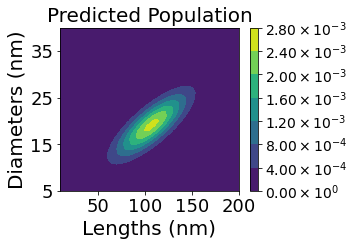

C:\Users\smgls\PycharmProjects\UC_Berkeley_Research_second_year\AuNR_HT_synthesis_and_analysis\Size_Deconvolution_files\Fully_Automated\AuNR_Automated_Analysis.py:6637: UserWarning: The following kwargs were not used by contour: 'cm'
  plt.contourf(self.lengths, self.diameters, self.true_pop_matrix.T, cm='viridis')


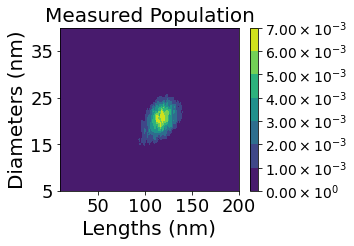

C:\Users\smgls\PycharmProjects\UC_Berkeley_Research_second_year\AuNR_HT_synthesis_and_analysis\Size_Deconvolution_files\Fully_Automated\AuNR_Automated_Analysis.py:6653: UserWarning: The following kwargs were not used by contour: 'cm'
  plt.contourf(self.lengths, self.diameters, true_matrix_from_means, cm='viridis')


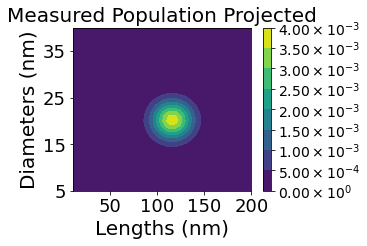

C:\Users\smgls\PycharmProjects\UC_Berkeley_Research_second_year\AuNR_HT_synthesis_and_analysis\Size_Deconvolution_files\Fully_Automated\AuNR_Automated_Analysis.py:6669: UserWarning: The following kwargs were not used by contour: 'cm'
  plt.contourf(self.lengths, self.diameters, overlap_matrix.T, cm='viridis')


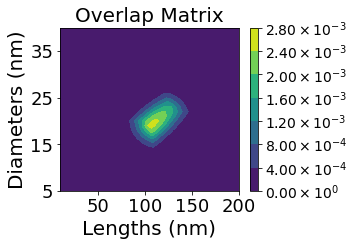

0.6009883460041656

In [15]:
long_rod_fit.calc_overlap_from_lit(long_rod_fit.fit_results['len_dia_correlation_rel_std'], 'len_dia_correlation_rel_std',
                                  show_overlap_plots = True)

100x21nm
115x21nm
130x21nm


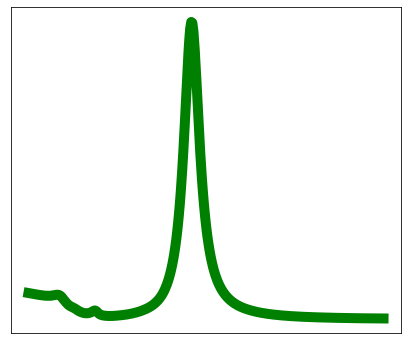

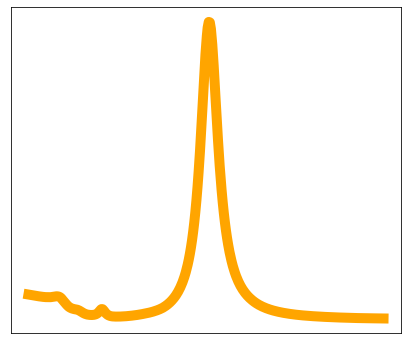

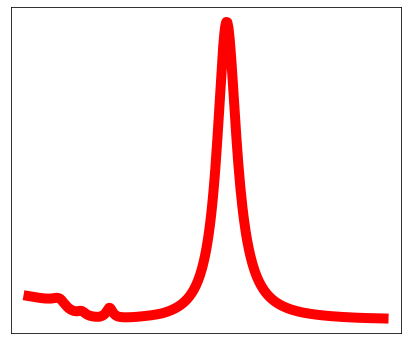

In [16]:
rod_indicies = [7641, 7652, 7663]
color_list = ['g', 'orange', 'r','k','k','k']
legend_labels = ["100x21nm", "115x21nm","130x21nm"]
for i in range(0, len(rod_indicies)):
    print(legend_labels[i])
    wavelengths = np.arange(401, 1700, 1)
    plt.figure(figsize = (7.0, 6.0))
    waves1 = temp.iloc[rod_indicies[i]].results['wavelength_micron']*1000
    intens1 = temp.iloc[rod_indicies[i]].results['orientation_av_absorption_CrossSection_m2']
    
    f = interp1d(waves1, intens1)
    plt.plot(wavelengths, f(wavelengths), color = color_list[i], linewidth = 10)
    
    # plt.title("Single Particle Spectrum " + legend_labels[i], fontsize = 18)
    # plt.xlabel("Wavelength (nm)", fontsize = 16)
    # plt.ylabel("Absorbance", fontsize = 16)
    # plt.legend([legend_labels[i]], fontsize = 12)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(legend_labels[i]+'.pdf', bbox_inches = 'tight', transparent=True)

100x16nm
115x16nm
130x16nm


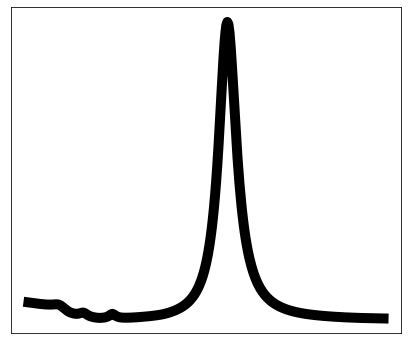

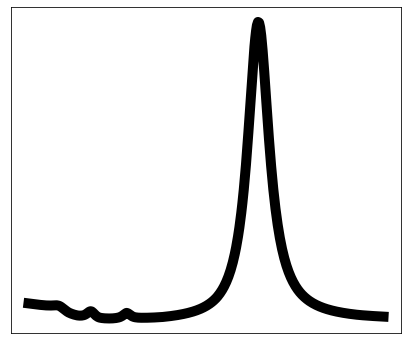

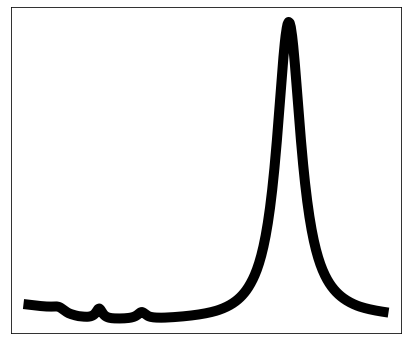

In [17]:
# rod_indicies = [7292, 7293, 7307, 7321, 7322]
rod_indicies = [7292, 7307, 7322]
color_list = ['k', 'k','k','k','k']
# legend_labels = ["100x16nm", "101x16nm", "115x16nm","129x16nm", "130x16nm"]
legend_labels = ["100x16nm", "115x16nm", "130x16nm"]

for i in range(0, len(rod_indicies)):
    print(legend_labels[i])
    wavelengths = np.arange(401, 1700, 1)
    plt.figure(figsize = (7.0, 6.0))
    waves1 = temp.iloc[rod_indicies[i]].results['wavelength_micron']*1000
    intens1 = temp.iloc[rod_indicies[i]].results['orientation_av_absorption_CrossSection_m2']
    
    f = interp1d(waves1, intens1)
    plt.plot(wavelengths, f(wavelengths), color = color_list[i], linewidth = 10)
    
    # plt.title("Single Particle Spectrum " + legend_labels[i], fontsize = 18)
    # plt.xlabel("Wavelength (nm)", fontsize = 16)
    # plt.ylabel("Absorbance", fontsize = 16)
    # plt.legend([legend_labels[i]], fontsize = 12)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(legend_labels[i]+'.pdf', bbox_inches = 'tight', transparent=True)

100x27nm
115x27nm
130x27nm


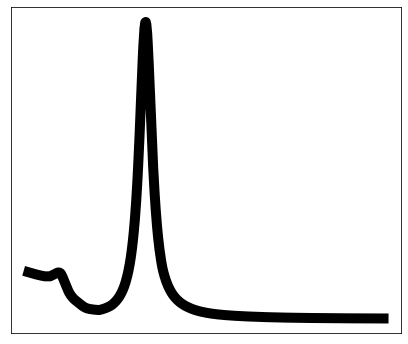

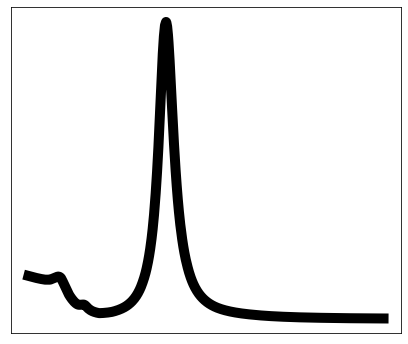

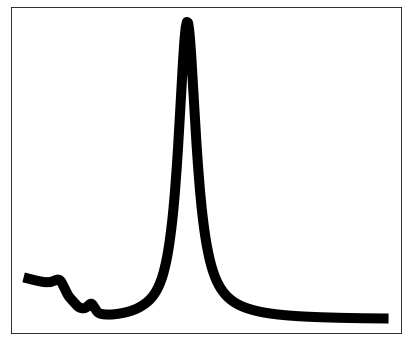

In [18]:
# rod_indicies = [8481, 8482, 8496, 8510, 8511]
rod_indicies = [8481, 8496, 8511]
color_list = ['k', 'k','k','k','k']
# legend_labels = ["100x27nm", "101x27nm", "115x27nm","129x27nm", "130x27nm"]
legend_labels = ["100x27nm", "115x27nm", "130x27nm"]

for i in range(0, len(rod_indicies)):
    print(legend_labels[i])
    wavelengths = np.arange(401, 1700, 1)
    plt.figure(figsize = (7.0, 6.0))
    waves1 = temp.iloc[rod_indicies[i]].results['wavelength_micron']*1000
    intens1 = temp.iloc[rod_indicies[i]].results['orientation_av_absorption_CrossSection_m2']
    
    f = interp1d(waves1, intens1)
    plt.plot(wavelengths, f(wavelengths), color = color_list[i], linewidth = 10)
    
    # plt.title("Single Particle Spectrum " + legend_labels[i], fontsize = 18)
    # plt.xlabel("Wavelength (nm)", fontsize = 16)
    # plt.ylabel("Absorbance", fontsize = 16)
    # plt.legend([legend_labels[i]], fontsize = 12)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(legend_labels[i]+'.pdf', bbox_inches = 'tight', transparent=True)

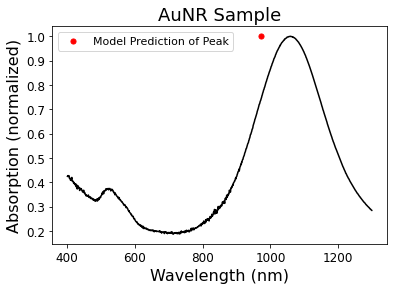

In [19]:
#plt.plot(temp.iloc[1100].results['wavelength_micron'], temp.iloc[1100].results['orientation_av_absorption_CrossSection_m2']) 
plt.plot(wang_long_rod['Wavelength nm.'][0:899], wang_long_rod['Abs.'][0:899]/max(wang_long_rod['Abs.'][0:899]), color = 'k')
plt.xlabel("Wavelength (nm)", fontsize = 16)
plt.ylabel("Absorption (normalized)", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.scatter(971, 1, color = 'r', s = 26, label = "Model Prediction of Peak")
plt.legend(fontsize = 11)
plt.title("AuNR Sample", fontsize = 18)
plt.show()

#plt.plot(temp.iloc[14267].results['wavelength_micron']*1000, temp.iloc[14267].results['orientation_av_absorption_CrossSection_m2']/max(temp.iloc[14267].results['orientation_av_absorption_CrossSection_m2'])) 

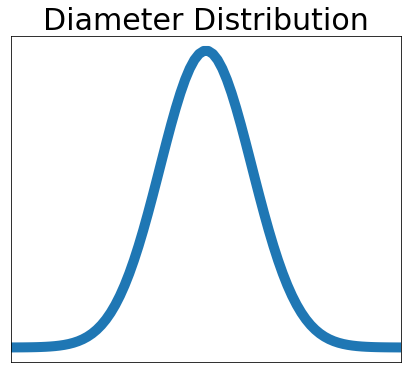

In [20]:
mu = 0
variance = 0.5
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.figure(figsize = (7.0, 6.0))
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth = 10)
plt.xticks([])
plt.yticks([])
plt.title("Diameter Distribution", fontsize = 30)
plt.xlim(-3,3)
plt.show()

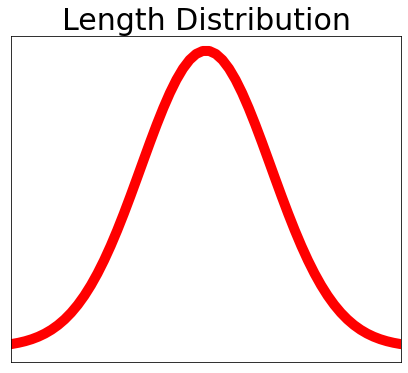

In [21]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.figure(figsize = (7.0, 6.0))
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth = 10, color = 'r')
plt.xticks([])
plt.yticks([])
plt.title("Length Distribution", fontsize = 30)
plt.xlim(-3,3)
plt.show()

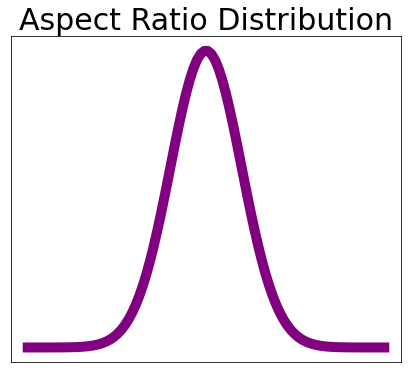

In [22]:
mu = 0
variance = 0.3
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.figure(figsize = (7.0, 6.0))
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth = 10, color = 'purple')
plt.xticks([])
plt.yticks([])
plt.title("Aspect Ratio Distribution", fontsize = 30)
plt.xlim(-3,3)
plt.show()